# K-nearest neighbors

In [44]:
import numpy as np

class KNN(object):
    def __init__(self, k=1):
        self.k = k
        self.pontos = None
        self.rotulos = None
    
    @staticmethod
    def distancia_euclianada(p, q):
        return np.sqrt(np.sum((p - q)**2))
    
    def fit(self, X, y):
        self.pontos = X
        self.rotulos = y
    
    def predict(self, X):
        predicoes = []
        
        for p in X:
            d = [ self.distancia_euclianada(p, q) for q in self.pontos]
            ds = np.argsort(d)
            iknn = ds[:self.k]
            rotulos_knn = self.rotulos[iknn]
            rotulos, count = np.unique(rotulos_knn, return_counts=True)
            pred = rotulos[np.argmax(count)]
            predicoes.append(pred)
        
        
        return np.array(predicoes)

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
ds = load_iris(as_frame=True)

In [47]:
ds.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
def obter_atributos(ds, atributos):
    df = ds.frame[[*atributos, 'target']] # * é o spread operator
    X = df[atributos]
    y = df['target']
    
    return df, X, y

atributos = ['sepal length (cm)', 'sepal width (cm)']
df, X, y = obter_atributos(ds, atributos)

In [7]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X.values, y.values, 
                                                         train_size=0.2, random_state=1, 
                                                         stratify=y.values)

Acuracia no teste: 0.77


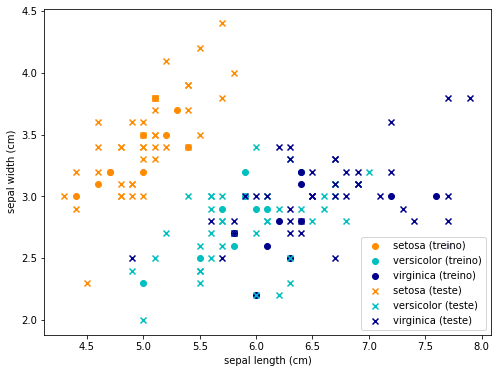

In [8]:
knn = KNN(k=1)
knn.fit(X_treino, y_treino)
pred = knn.predict(X_teste)

print("Acuracia no teste: %.2f" % (accuracy_score(y_teste, pred)))
def plotar_instancias(X_treino, y_treino, X_teste, y_teste, cmap=None, ax=None):
    if cmap is None:
        cmap = ['darkorange', 'c', 'darkblue']
    if ax is None:
        _, ax = plt.subplots(figsize=(8,6))
    ax.scatter(X_treino[y_treino==0,0], X_treino[y_treino==0,1], c=cmap[0], label='setosa (treino)')
    ax.scatter(X_treino[y_treino==1,0], X_treino[y_treino==1,1], c=cmap[1], label='versicolor (treino)')
    ax.scatter(X_treino[y_treino==2,0], X_treino[y_treino==2,1], c=cmap[2], label='virginica (treino)')

    ax.scatter(X_teste[y_teste==0,0], X_teste[y_teste==0,1], c=cmap[0], marker='x', label='setosa (teste)')
    ax.scatter(X_teste[y_teste==1,0], X_teste[y_teste==1,1], c=cmap[1], marker='x', label='versicolor (teste)')
    ax.scatter(X_teste[y_teste==2,0], X_teste[y_teste==2,1], c=cmap[2], marker='x', label='virginica (teste)')
    ax.legend(loc='best')
    
    return ax
    
ax = plotar_instancias(X_treino, y_treino, X_teste, y_teste)
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
plt.show()

# FRONTEIRA DE DECISÃO

In [18]:
%timeit pred = knn.predict(X_teste)

33 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knnsk = KNeighborsClassifier(n_neighbors=1)
knnsk.fit(X_treino, y_treino)
pred = knnsk.predict(X_teste)

In [19]:
%timeit pred = knnsk.predict(X_teste)

3.27 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


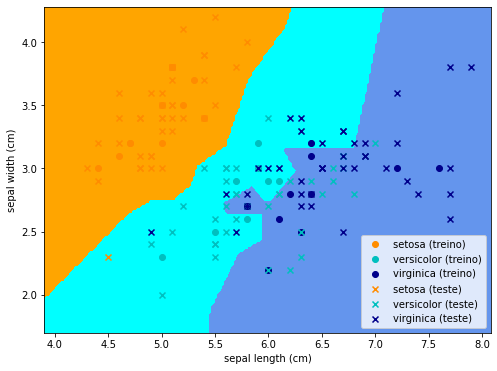

In [26]:
from matplotlib.colors import ListedColormap

def plotar_fronteira_decisao(classificador, X_treino, y_treino, X_teste, y_teste, ax=None):

    #criar um mapa de cores de forma que a fronteira de decisão seja clara
    #e os pontos das classes correspondentes sejam da mesma cor, mas mais escuros.
    cmap_claro = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_escuro = ['darkorange', 'c', 'darkblue']

    #passo do grid de predições. Quanto menor, melhor a resolução, mas mais demorado pra calcular.
    grafico_delta = 0.02 
    
    #Criar o grid de predições. Pra prática estamos criando pontos no espaço de atributos para
    #fazer as predições. Estas predições são usadas depois para fazer um gráfico de contornos preenchido com
    #as regiões da cor de cada classe.
    xmin, xmax = X_treino[:,0].min() - 0.5, X_treino[:,0].max() + 0.5
    ymin, ymax = X_treino[:,1].min() - 0.5 , X_treino[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(xmin, xmax, grafico_delta),
                         np.arange(ymin, ymax, grafico_delta))
    
    #Realizar as predições dos exemplos gerados acima.
    pred_grafico = classificador.predict(np.c_[xx.ravel(), yy.ravel()])
    pred_grafico = pred_grafico.reshape(xx.shape)

    if ax is None:
        _, ax = plt.subplots(figsize=(8,6))
    
    #Plotar o gráfico de contornos
    ax.contourf(xx,yy,pred_grafico, cmap=cmap_claro)
    
    #Plotar as instâncias
    plotar_instancias(X_treino, y_treino, X_teste, y_teste, cmap_escuro, ax=ax)
    
    #ajeitar os limites dos eixos e seus rótulos.
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(df.columns[0])
    ax.set_ylabel(df.columns[1])
    
    return ax

plotar_fronteira_decisao(knnsk, X_treino, y_treino, X_teste, y_teste)

plt.show()

In [56]:
def plotar_fronteiras_ks(X, y, random_state):
    nrows = 3
    ncols = 3

    X_treino, X_teste, y_treino, y_teste = train_test_split(X.values, y.values, 
                                                             train_size=0.2, random_state=random_state, 
                                                             stratify=y.values)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))

    k = 1
    for row in range(nrows):
        for col in range(ncols):
            clf = KNeighborsClassifier(n_neighbors=k)
            clf.fit(X_treino, y_treino)
            pred = clf.predict(X_teste)

            plotar_fronteira_decisao(clf, X_treino, y_treino, X_teste, y_teste, ax=axes[row][col])

            axes[row][col].get_legend().set_visible(False)
            axes[row][col].set_title("k = %d, acc(teste)= %.2f" % (k, accuracy_score(y_teste, pred)))
            k+=2

    fig.tight_layout


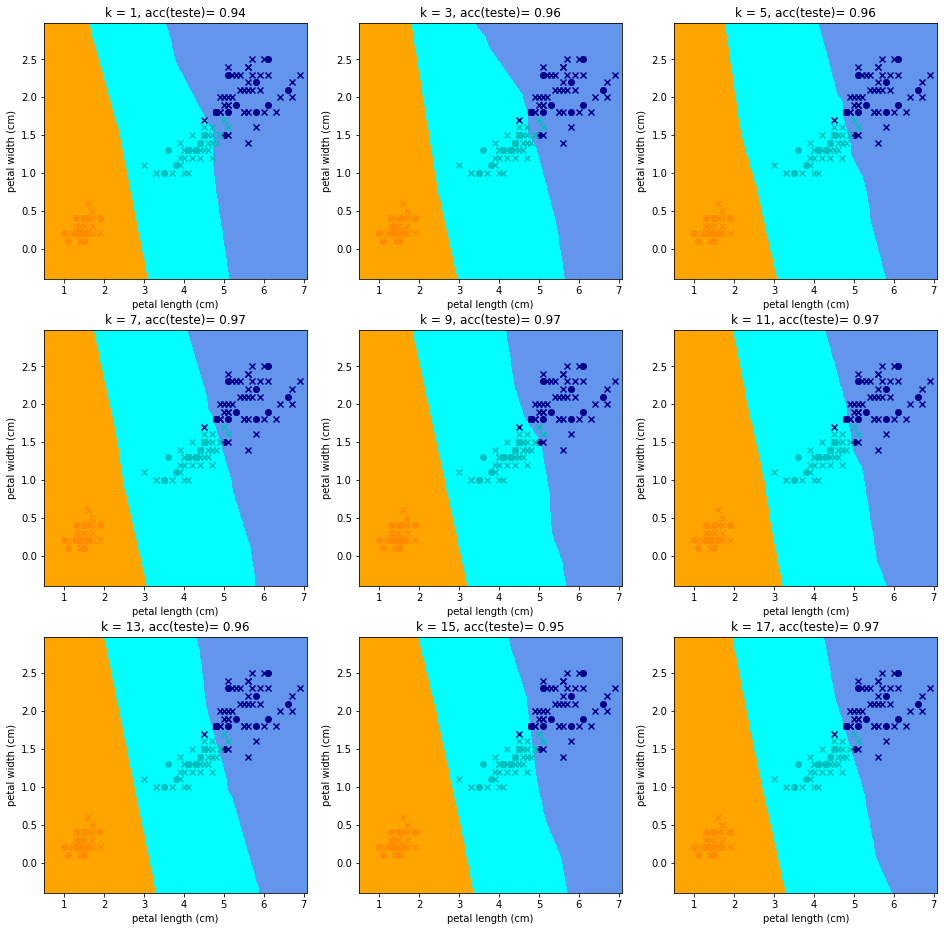

In [58]:
atributos = ['petal length (cm)', 'petal width (cm)']

df, X, y = obter_atributos(ds, atributos)

plotar_fronteiras_ks(X, y, 99)